In [42]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, concatenate, Embedding, LSTM, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import np_utils, plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# const

In [24]:
predict_hours = 1

# utils

In [5]:
def searchColumn(word, cols):
    return [col for col in cols if word in col]

# load data

In [28]:
data_path = "../data/std_data.csv"
std_data = pd.read_csv(data_path, header=0)
std_data["time"] = pd.to_datetime(std_data["time"])

# input/label

In [48]:
data_ = std_data[searchColumn("measured", data.columns)].copy()
data_["time"] = std_data["time"] - timedelta(hours=predict_hours)
data_.columns = ["label_UGRD", "label_VGRD", "time"]
data = pd.merge(std_data, data_, on="time", how="left")
data = data.fillna(0)

In [49]:
input_params = ["measured", "msm", "kishocho"]


input_cols = []
for param in input_params:
    cols = searchColumn(param, rawdata.columns)
    input_cols.extend(cols)

In [53]:
label_cols = searchColumn("label", data.columns)

# model

In [60]:
def custom_model(inputs):
    inputs_size = inputs.shape[1]
    inputs = Input(shape=(inputs_size,), name="inputs")
    
    x = Dropout(0.2)(inputs)
    x = Dense(inputs_size*10, activation='relu')(x)
    
    x = Dropout(0.5)(x)
    x = Dense(inputs_size*10, activation='relu')(x)
    
    x = Dropout(0.5)(x)
    x = Dense(inputs_size, activation='relu')(x)
    
    x = Dropout(0.5)(x)
    predictions = Dense(1)(x)

    model = Model(inputs=inputs, outputs=predictions)

    model.compile(optimizer='adam', loss='mse')
    SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))
    return model

In [70]:
def custom_fit(model, inputs, label):
    callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    history = model.fit(np.array(inputs), np.array(label),
                        batch_size=4096,
                        epochs=2,
                        verbose=0,
                        validation_split=0.1,
                        callbacks=[callback]
                       )
    return (model, history)

In [71]:
inputs = data[input_cols]
label = data[label_cols[0]]

model = custom_model(inputs)
model, history = custom_fit(model, inputs, label)

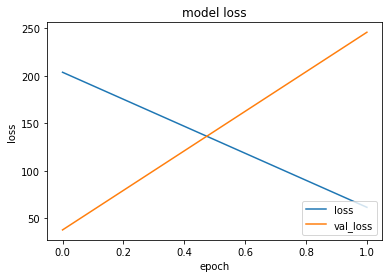

In [72]:
def plot_history(history):

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [75]:
int(8.9)

8